In [1]:
# coding=utf-8
#importação da biblioteca pandas, quando for necessário usar a mesma irá ser utilizado pd em vez de pandas
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import elipse_confidence_plot
import matplotlib.cm as cm
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Leitura do ficheiro dos dados, especificando que o mesmo não tem nome para as colunas (header = None)
# Comando read_csv da biblioteca Pandas é o equivalente ao read.table do R, uma vez que temos o ficheiro em formato csvx-special/nautilus-clipboard

df = pd.read_csv('/home/raquel/Uso-de-Machine-Learning-para-previs-o-de-doen-as/breast-cancer-wisconsin.data.csv',
                header = None)
#df = pd.read_csv('/home/anasapata/Personal/ProjetoIntegrado/Uso-de-Machine-Learning-para-previs-o-de-doen-as/breast-cancer-wisconsin.data.csv',
                # header = None)


NameError: name 'pd' is not defined

In [3]:
# Mostra as primeiras 5 linhas do ficheiro/data frame
#print(df.head())# Uma vez que o ficheiro não tem nome para as colunas, tal como acontece posteriormente com a data frame

In [4]:
# é então necessário atribuir os respetivos nomes às mesmas para tal
df.columns = ['sample_code_number',
              'clump_thickness',
              'uniformity_of_cell_size',
              'uniformity_of_cell_shape',
              'marginal_adhesion',
              'single_epithelial_cell_size',
              'bare_nuclei',
              'bland_chromatin',
              'normal_nucleoli',
              'mitosis',
              'classes']

# Mostrar novamente as primeira 5 linhas de modo a confirmar que os nomes das colunas lhes foram atru«ibuidos
#print(df.head())

In [5]:
# Quando classes tem o valor 2 deverá torna-se "benign", quando tem o valor 4 deverá tornar-se "malignant" e nos restantes casos NA
df.classes.replace([2, 4], ['benign', 'malignant'], inplace = True)

# Verificar que alterou os valores
#print(df.head())
#print(df.tail())

In [6]:
# Quando existe o valor ? é atribuido ao mesmo o valor NaN (equivalente ao NA)
df.replace('?', np.NaN, inplace = True)

# Verifica quais as colunas com valores nulos
null_columns = df.columns[df.isnull().any()]

# Conta o número de celulas com valores nulos
print("Numero de celulas sem valor")
print(df[null_columns].isnull().sum())

Numero de celulas sem valor
bare_nuclei    16
dtype: int64


In [7]:
# Verificar o tipo dos elementos das colunas 1:10 antes de proceder à alteração
#print(df.dtypes)

# Passar os elementos das colunas 2:10 para o tipo numerico
df.iloc[:,1:10] = df.iloc[:,1:10].apply(lambda x: pd.to_numeric(x),1)

# Verificar se os elementos das colunas referidas já se encontram todos em formato numerico
#print(df.dtypes)


In [8]:
# https://scikit-learn.org/stable/modules/impute.html
# https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
# https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx        glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py
# Informar de como deverá ser feito o impute dos dados
imp = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
# Verificar o que está a ser aplicado
imp.fit(df.iloc[:,1:10])

# Realizar a transformação dos dados
df_impute = imp.transform(df.iloc[:,1:10])
# Uma vez que o df_impute é do tipo numpy.ndarray é utilizado o metodo savetxt do numpy para
# guardar os resultados obtidos e verificar que já não existem NaN
# np.savetxt('/home/raquel/teste.csv', df_impute, delimiter = ";")
# np.savetxt('/home/anasapata/Personal/ProjetoIntegrado/teste.csv', df_impute, delimiter = ";")

# Utilizar outro metodo para impute
imp2 = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 15), random_state = 0)
imp2.fit(df.iloc[:,1:10])
df_impute2 = imp2.transform(df.iloc[:,1:10])
# np.savetxt('/home/raquel/teste_2_2.csv', df_impute2, delimiter = ";")
# np.savetxt('/home/anasapata/Personal/ProjetoIntegrado/teste_2.csv', df_impute2, delimiter = ";")

# Como o resultado do impute é um numpy ndarray existe a necessidade de passar o mesmo para o formato data frame
df_impute2_df = pd.DataFrame(data = df_impute2)

# atribuir o nome das colunas aos dados onde foi resultado o impute
df_impute2_df.columns = ['clump_thickness',
              'uniformity_of_cell_size',
              'uniformity_of_cell_shape',
              'marginal_adhesion',
              'single_epithelial_cell_size',
              'bare_nuclei',
              'bland_chromatin',
              'normal_nucleoli',
              'mitosis']

# Converter todas as colunas para inteiro
df_impute2_df = df_impute2_df.astype('int64')

# Selecionar a ultima coluna do data frame original para se poder efetuar o merge com os dados com o impute
cf = df.iloc[:,10]

# Colocar todas as data frames a juntar num array
L = [cf, df_impute2_df]
# Fazer o merge de todos os dados
df_final = pd.concat(L, axis = 1)

# Definir a coluna classes como uma variavel categorica
df_final['classes'] = df_final['classes'].astype('category')

ben = df_final[df_final.classes == 'benign']
mal = df_final[df_final.classes == 'malignant']
summary_classes = 'benign     malignant\n' + str(ben.shape[0]) + '        ' + str(mal.shape[0])
print(summary_classes)

benign     malignant
458        241


Cancer data set dimensions : (699, 11)


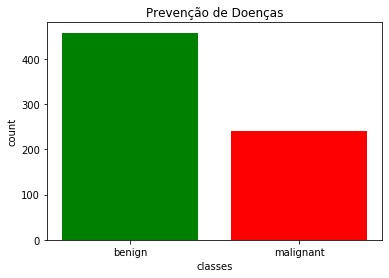

In [9]:
# Histograma
print("Cancer data set dimensions : {}".format(df.shape)) #Dimensão de Conjunto de dados

# Obtenção da variavel classes
dados=df_final['classes']

x = np.arange(2)
colors = ['green', 'red']
plt.bar(x, height= [ben.shape[0],mal.shape[0]], color=colors )
plt.xticks(x, ['benign','malignant'])
plt.xlabel('classes')
plt.ylabel('count')
plt.title('Prevenção de Doenças')
plt.show()

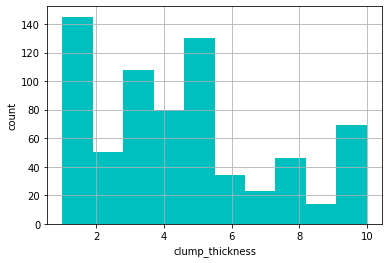

In [10]:
#Response variable for regression
# Grafico- http://pandas-docs.github.io/pandas-docs-travis/user_guide/visualization.html In[35],In[36]

df_final['clump_thickness'].hist( figsize=(6, 4),color='c',) #figsize-dimensao do grafico
plt.xlabel('clump_thickness')
plt.ylabel('count')
plt.show()

In [11]:
# Necessário obter os dados sem a primeira coluna e fazer a sua transposta
df_without_classes = df_final.iloc[:,1:]
df_without_classes_transpose = df_without_classes.transpose()
df_normalize = StandardScaler().fit_transform(df_without_classes_transpose)
# Confirmação da normalização dos dados
#print("(" + str(np.mean(df_normalize)) +","+str(np.std(df_normalize))+")")

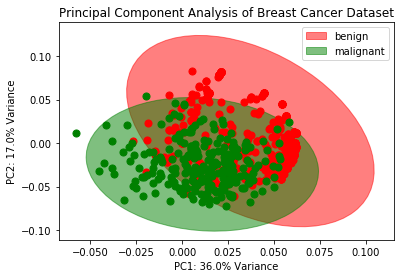

In [12]:
# Irão ser encontradas duas componentes principais (9)
pca_9 = PCA(n_components = 9)
# Aplicado PCA aos dados
principalComponents_9 = pca_9.fit_transform(df_normalize)
# Data Frame para observação do valor de cada variavel na respetiva componente
principal_Df_2 = pd.DataFrame(data = pca_9.components_[:,[0,1]]
             , columns = ['principal component 1', 'principal component 2'])
#print(principal_Df_2)


principalComponents_Df = pd.DataFrame(data = pca_9.components_.transpose(),
              columns = ['PC1',
              'PC2',
              'PC3',
              'PC4',
              'PC5',
              'PC6',
              'PC7',
              'PC8',
              'PC9'])
principalComponents_Df['Group'] = df_final['classes']

#print(principalComponents_Df.head())
# Percentagem de explicação de cada componente
#print('Explained variation per principal component: {}'.format(pca_9.explained_variance_ratio_))
#print('Vetores pp per principal component: {}'.format(pca_9.singular_values_))

fig, ax = plt.subplots()
plt.xlabel('PC1: ' + str(round(pca_9.explained_variance_ratio_[0],2)*100) + "% Variance")
plt.ylabel('PC2: ' + str(round(pca_9.explained_variance_ratio_[1],2)*100) + "% Variance")
plt.title("Principal Component Analysis of Breast Cancer Dataset")
targets = ['benign', 'malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalComponents_Df['Group'] == target
    plt.scatter(principalComponents_Df.loc[indicesToKeep, 'PC1']
               , principalComponents_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
    elipse_confidence_plot.confidence_ellipse(principalComponents_Df.loc[indicesToKeep, 'PC1'], principalComponents_Df.loc[indicesToKeep, 'PC2'],
                       ax, alpha=0.5, facecolor=color, edgecolor=color, zorder=0)

plt.legend(targets,prop={'size': 10})
plt.show()

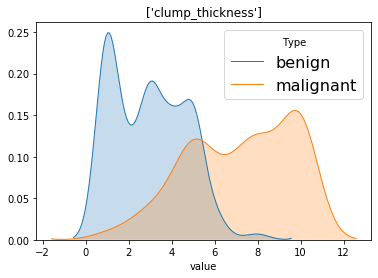

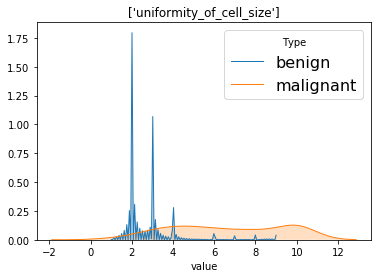

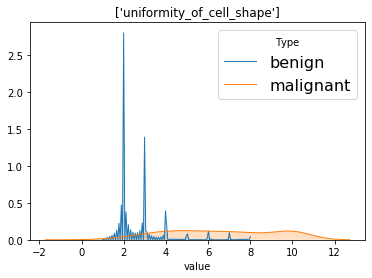

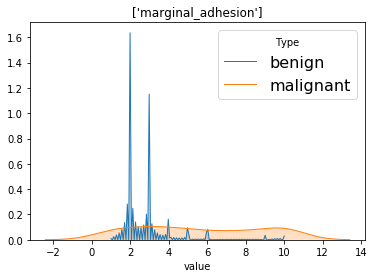

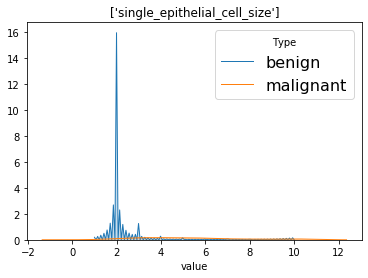

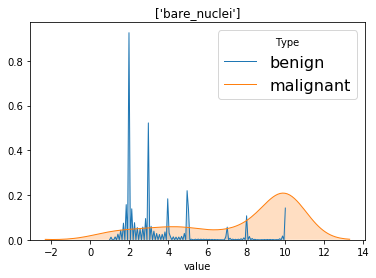

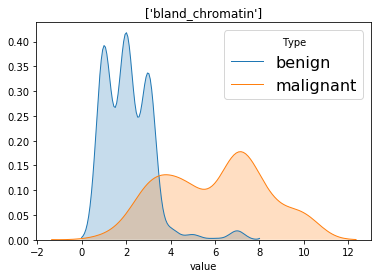

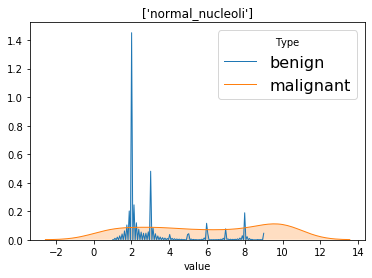

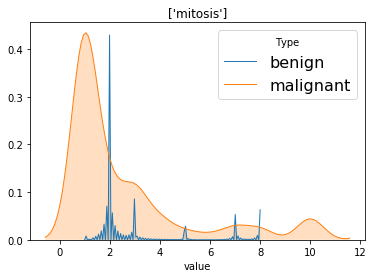

In [13]:
df_final_tidy = pd.melt(df_final, id_vars='classes')
for i in range(len(df_final_tidy['variable'].unique())):
    df_use = df_final_tidy.iloc[(i*699):((i+1)*699),:]
    for target in targets:
        subset = df_use[df_use['classes']==target]
        sns.distplot(subset['value'], hist=False, kde=True,  kde_kws = {'shade': True, 'linewidth': 1},
                     label = target)
    plt.legend(prop={'size': 16}, title = 'Type')
    plt.title(df_use['variable'].unique())
    plt.show()

In [14]:
#------------------Treinamento, validacao e teste dos dados-------------------------------------------- ?

training_set, testing_set= train_test_split(df_final,test_size=0.3, random_state = 42)

# FALTAM OS GRÁFICOS!

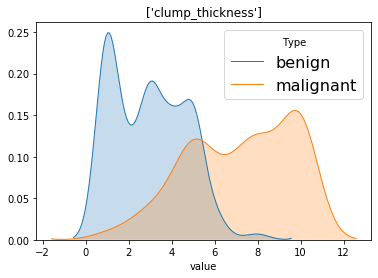

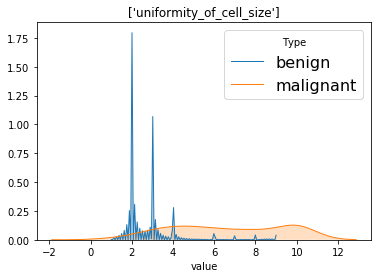

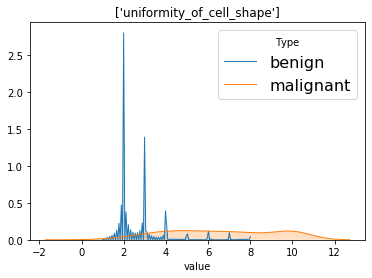

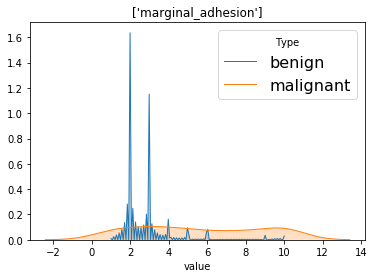

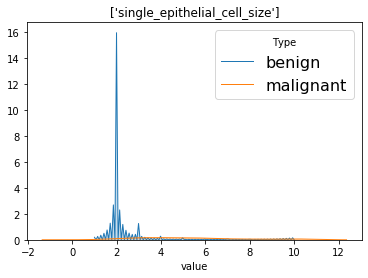

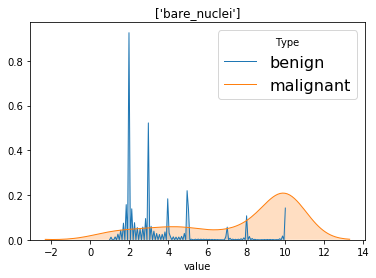

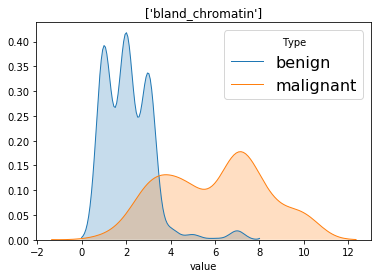

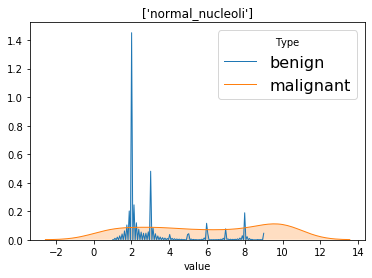

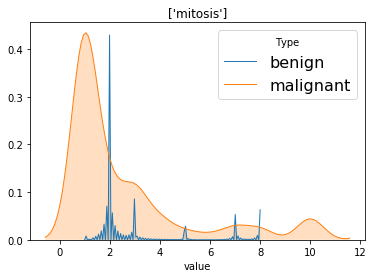

In [15]:
df_final_dply = pd.melt(df_final, id_vars='classes')
for i in range(len(df_final_dply['variable'].unique())):
    df_use = df_final_tidy.iloc[(i*699):((i+1)*699),:]
    for target in targets:
        subset = df_use[df_use['classes']==target]
        sns.distplot(subset['value'], hist=False, kde=True,  kde_kws = {'shade': True, 'linewidth': 1},
                     label = target)
    plt.legend(prop={'size': 16}, title = 'Type')
    targets = ['benign', 'malignant']
    colors = ['r', 'g']
    plt.title(df_use['variable'].unique())
    plt.show()

/home/anasapata/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                 Generalized Linear Model Regression Results                  
Dep. Variable:        clump_thickness   No. Observations:                  489
Model:                            GLM   Df Residuals:                      479
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          3.9545
Method:                          IRLS   Log-Likelihood:                -1025.0
Date:                Wed, 18 Dec 2019   Deviance:                       1894.2
Time:                        15:45:35   Pearson chi2:                 1.89e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

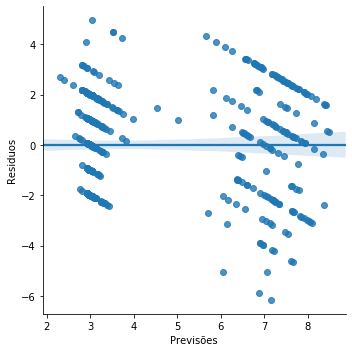

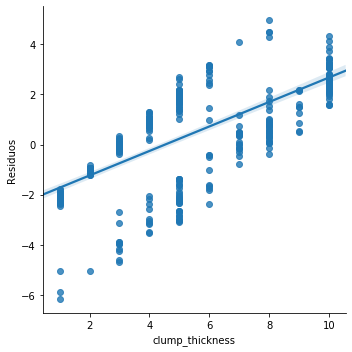

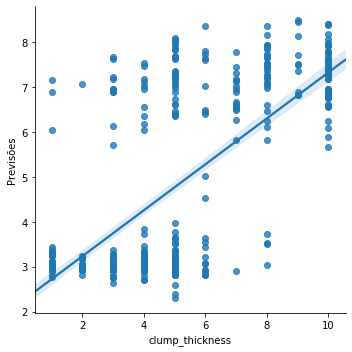

In [16]:
classes_training = pd.DataFrame(training_set.as_matrix(columns = ['classes']), columns = ['classes'])
training_set_normalize = StandardScaler(copy = False).fit_transform(training_set.iloc[:, 1:10])

training_set_normalize = pd.DataFrame(training_set_normalize, columns = ['clump_thickness',
              'uniformity_of_cell_size',
              'uniformity_of_cell_shape',
              'marginal_adhesion',
              'single_epithelial_cell_size',
              'bare_nuclei',
              'bland_chromatin',
              'normal_nucleoli',
              'mitosis'])

L3 = [classes_training, training_set_normalize.loc[:, training_set_normalize.columns != 'classes']]
training_set_normalize = pd.concat(L3, axis = 1)
training_set_normalize_clump = training_set_normalize.loc[:, training_set_normalize.columns !=  'clump_thickness']


formula  = 'clump_thickness ~ classes + uniformity_of_cell_size + uniformity_of_cell_shape + \
            marginal_adhesion + single_epithelial_cell_size + bare_nuclei + bland_chromatin + \
            normal_nucleoli + mitosis'
random.seed(42)
model_glm = smf.glm(formula = formula, data = training_set).fit()
print(model_glm.summary())

# Fitted Values = Predictions
pred = model_glm.fittedvalues
residuos = model_glm.resid_response
y = training_set['clump_thickness']

df_plot1 = pd.concat([pred, residuos], axis = 1)
df_plot1.columns = ['Previsões','Residuos']
sns.lmplot(x = 'Previsões', y = 'Residuos', data = df_plot1)
plt.show()

df_plot2 = pd.concat([y, residuos], axis = 1)
df_plot2.columns = ['clump_thickness','Residuos']
sns.lmplot(x = 'clump_thickness', y = 'Residuos', data = df_plot2)
plt.show()

df_plot3 = pd.concat([y, pred], axis = 1)
df_plot3.columns = ['clump_thickness','Previsões']
sns.lmplot(x = 'clump_thickness', y = 'Previsões', data = df_plot3)
plt.show()

In [6]:
from sklearn import tree
y = df_final.loc[:, df_final.columns ==  'classes']
x = df_final.loc[:, df_final.columns !=  'classes']

plt.figure()
clf = tree.DecisionTreeClassifier().fit(x, y)
tree.plot_tree(clf, filled=True)
plt.show()

NameError: name 'df_final' is not defined

In [8]:
def build_tree(data, labels, tree, depth = 1):
    classes, counts = np.unique(labels, return_counts=True)
    n_classes = classes.shape[0]
plt.show()

NameError: name 'plt' is not defined